This code reads 'current_datetime' from 'initial_parameters.py'. Further, it loads data from 'results/current_datetime' from simulations done before and creates results represented as plots. This code is called from 'main_code.py' to obtain results automatically.

# Import parameters

In this section, the data (arrays) are transformed into numpy arrays. Data and fits are plotted; plots are saved. Results are saved in subdirectories using current date and time; the simulation conditions are there explicitly described by an additional .dat-file.

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import curve_fit
import csv

#load parameters
import initial_parameters

Monomers = initial_parameters.Monomers
gamma = initial_parameters.gamma
Bonds = initial_parameters.Bonds
Kuhn_length_b = initial_parameters.Kuhn_length_b
tau_rouse_theory = initial_parameters.tau_rouse_theory
kT = initial_parameters.kT

In [12]:
#make path to 'results/current_datetime' to save all analysis
path_results = "results/"+str(initial_parameters.current_datetime)+"/"

In [13]:
#create lists for quantities for graphical representation (plots)
list_of_times = []
list_of_sq_end_to_end_distances = []
list_of_sq_distance_of_cm = []
list_of_auto_corr_ee_vector = []

averaged_quantities = open(path_results+'quantities_averaged.dat','r')
lines = csv.reader(averaged_quantities, delimiter='	')
    
#skip the header
next(lines)
    
for line in lines:

        #time has to be multiplied by dt, otherwise it is number of timesteps
        list_of_times.append(float(line[0])*initial_parameters.dt)
        list_of_sq_end_to_end_distances.append(float(line[1]))
        list_of_sq_distance_of_cm.append(float(line[2]))
        list_of_auto_corr_ee_vector.append(float(line[3]))


#close the file
averaged_quantities.close()

In [14]:
#open existing file (where initial parameters are saved) to add results
results_dat = open(path_results+'results.dat', 'a')

#results are added from following cells
results_dat.write("\n\n"+"-------"
                    "results:\n\n")

19

In [15]:
#set plot parameters

#change figure size
figure_size = plt.rcParams["figure.figsize"]
figure_size[0] = 9
figure_size[1] = 6
plt.rcParams['figure.figsize'] = figure_size

#set line width
plt.rcParams['lines.linewidth'] = 4

#set label size in the plots
plt.rcParams.update({'font.size': 18})

mean for t>=6*tau_Rouse: [148.61531762] +/- [0.91070451]


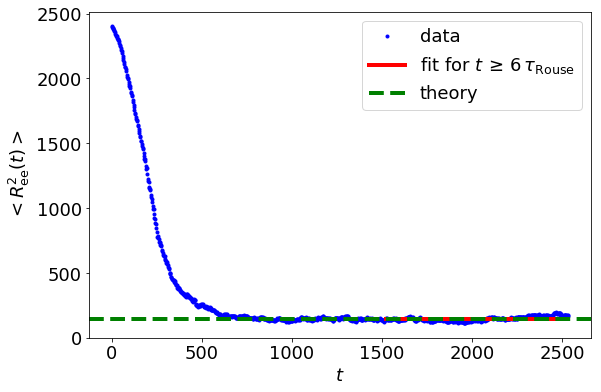

End-to-end distance in equilibrium (theory) = 146.99999999999997


In [16]:
#plot squared end-to-end distance as function of time

#convert array into numpy array and use short names
t = np.array(list_of_times)
y = np.array(list_of_sq_end_to_end_distances)

t_after_6_tau_rouse = t[int(len(y)/10*6):]
y_after_6_tau_rouse = y[int(len(y)/10*6):]

#define fit function; take independent variable as first argument
def func_sq_end_to_end_distance(t_after_6_tau_rouse, const):
    return const + t_after_6_tau_rouse*0

#fit the curve using function, t-values and y-values; return: optimal parameters and covariances
popt, pcov = curve_fit(func_sq_end_to_end_distance, t_after_6_tau_rouse, y_after_6_tau_rouse)

#calculate standard deviation from estimated covariance
perr = np.sqrt(np.diag(pcov))

#plot the results
plt.plot(t, y, 'b.', label='data')

#plot linear fit
plt.plot(t_after_6_tau_rouse, func_sq_end_to_end_distance(t_after_6_tau_rouse, *popt),
         'r-', label=(r'fit for $t\,\geq\,6\,\tau_{\mathrm{Rouse}}$'))


#write theoretical results into file
results_dat.write("Squared end-to-end distance in eq."+
                  "(Bonds * Kuhn_length_b^2) = "+
                  str(Bonds*Kuhn_length_b**2)+"\n\n")

print ("mean for t>=6*tau_Rouse: "+str(popt)+
       " +/- "+str(perr))

plt.axhline(y=(Bonds*Kuhn_length_b**2),color='g', linestyle='--',label=('theory'))

#set y range due to use of log-representation (otherwise y axis starts at extremely small values)
plt.ylim(0, None)


#save the plot
plt.legend(loc='best')
plt.xlabel(r'$t$')
plt.ylabel(r'$< R_{\mathrm{ee}}^2(t) >$')
plt.draw()
plt.savefig(path_results+'sq_end_to_end_distance.png')
plt.show()
plt.close()

print ("End-to-end distance in equilibrium (theory) = "+str(Bonds*Kuhn_length_b**2))

The plot above shows the change in squared end-to-end distance of the polymer. The theoretical value in quilibrium is equal to $N\,b^2$ ($N\,=\,$number of bonds, $b\,=\,$statistical lenght (Kuhn lenght)) and is shown as green dashed line.

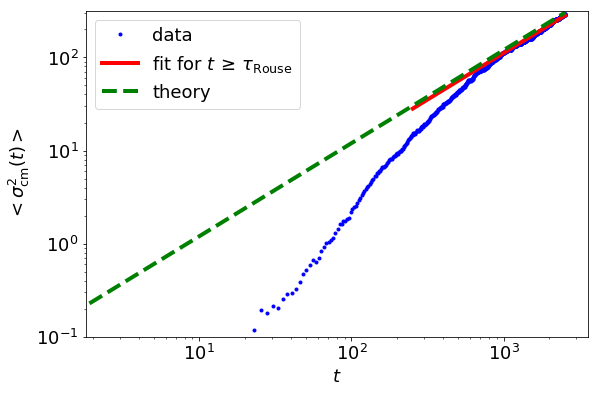

factor_sigma (theory)= 0.12
factor_sigma (simultaion)= [0.11162236] +/- [0.00015683]


In [19]:
#plot squared motion of center of mass

#covert arrays into numpy arrays and use short names (use t and y)
t = np.array(list_of_times)
y = np.array(list_of_sq_distance_of_cm)

#find index of time array so that the corresponding time is close to rouse_time
index_tau_rouse = (np.abs(t - tau_rouse_theory)).argmin()

t_after_tau_rouse = t[index_tau_rouse:]
y_after_tau_rouse = y[index_tau_rouse:]

#define fit function; take independent variable as first argument
def func_motion_of_cm(t_after_tau_rouse, const_cm):
    return const_cm*t_after_tau_rouse

#fit the curve using function, t-values and y-values; return: optimal parameters and covariances
popt, pcov = curve_fit(func_motion_of_cm, t_after_tau_rouse, y_after_tau_rouse)

#calculate standard deviation from estimated covariance
perr = np.sqrt(np.diag(pcov))

#calculate theoretical results
const_cm_theory = 6*kT/gamma/Monomers

#write theoretical and simulated results into file
results_dat.write("motion of center of mass:\n"+
                  "6*kT/gamma/Monomers (theory) = "
                  +str(const_cm_theory)+"\n"
                  
                  "6*kT/gamma/Monomers (simulation) = "
                  +str(popt)+" +/- "
                  +str(perr)+"\n\n")

#plot the results
plt.plot(t, y, 'b.', label='data')
plt.plot(t_after_tau_rouse, func_motion_of_cm(t_after_tau_rouse, *popt),
         'r-', label=(r'fit for $t\,\geq\,\tau_{\mathrm{Rouse}}$'))
plt.plot(t, const_cm_theory*t, 'g--', label=('theory'))

#save the plot
plt.legend(loc='best')

#set y range due to use of log-representation (otherwise y axis starts at extremely small values)
plt.ylim(0.1, None)

plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$t$')
plt.ylabel(r'$< \sigma_{\mathrm{cm}}^2(t) >$')
plt.draw()
plt.savefig(path_results+'sq_distance_of_cm.png')
plt.show()
plt.close()

print ("factor_sigma (theory)= "+str(const_cm_theory))
print ("factor_sigma (simultaion)= "+str(popt)+" +/- "+str(perr))

The plot above shows the motion of center of mass. Represented is the squared distance between current and initial position of center of mass. The red line is the fit, the green line the theoretical progress; the formula is: $\text{factor}_{\sigma}\,\cdot\,t\,=\,\sigma^2_{\text{cm}}(t)\,=\,\frac{6\,k_{\text{B}}\,T}{\gamma\,\left(N\,+\,1\right)}\,t$. $\gamma$ is the friction coefficient and $\left(N\,+\,1\right)$ the number of monomers (segments).

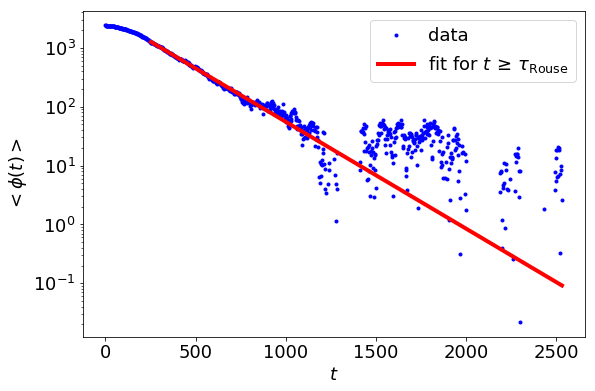

rouse time (theory) = 253.30295910584442
rouse time (simulation) = 239.22514153052867 +/- 1.2915132482744993


In [20]:
#plot auto-correlation end-to-end vector as function of time

#covert arrays into numpy arrays and use short names (full=all values)
t = np.array(list_of_times)
y = np.array(list_of_auto_corr_ee_vector)

#find index of time array so that the corresponding time is close to rouse_time
index_tau_rouse = (np.abs(t - tau_rouse_theory)).argmin()

#use 'valid' points for fit (after relaxation time)
t_valid = t[index_tau_rouse:]
y_valid = y[index_tau_rouse:]

#define fit function; take independent variable as first argument
def func_auto_corr_ee_vec(t, const_auto_corr, inverse_tau_rouse):
    
    #use instead of 1/tau_rouse inverse_tau_rouse, otherwise fit fails
    return const_auto_corr*np.exp(-t*inverse_tau_rouse)

#fit the curve using function, t-values and y-values
popt, pcov = curve_fit(func_auto_corr_ee_vec, t_valid, y_valid, [0, 0])

#calculate standard deviation from estimated covariance
perr = np.sqrt(np.diag(pcov))

#write theoretical and simulated results into file
results_dat.write("Attention: different offset due to different initial form of polymer!"+
                  "motion of center of mass:\n"+

                  "rouse time (theory) = "+str(tau_rouse_theory)+"\n"+
                  
                  #Attention: rouse time = 1/inverse_tau_rouse
                  "rouse time (simulation) = "+
                  str(1/popt[1])+" +/- "+
                  
                  #Attention: Because of transformation of iverse tau rouse into tau_rouse
                  #the error has to be transformed according to propagation of uncertainty
                  str(math.sqrt((-1/(popt[1]**2)*perr[1])**2))+"\n\n")

#plot the results
plt.plot(t, y, 'b.', label='data')
plt.plot(t_valid, func_auto_corr_ee_vec(t_valid, *popt),
         'r-', label=(r'fit for $t\,\geq\,\tau_{\mathrm{Rouse}}$'))

#save plot
plt.legend(loc='best')
plt.xlabel(r'$t$')
plt.yscale('log')
plt.ylabel(r'$< \phi(t) >$')
plt.draw()
plt.savefig(path_results+'auto_corr_ee_vector.png')
plt.show()
plt.close()

print ("rouse time (theory) = "+str(tau_rouse_theory))
print ("rouse time (simulation) = "+str(1/popt[1])+" +/- "+
         str(math.sqrt((-1/(popt[1]**2)*perr[1])**2)))

The plot above represents the auto-correlation of end-to-end vector. For $t\,\gtrsim\,\tau_{\text{R}}\,=\,\frac{\gamma\,N^2\,b^2}{3\,\pi^2\,k_{\text{B}}\,T}$ (Rouse time), the auto-correlation decays exponentially with $\phi(t)\,\propto\,\exp(-t/\tau_{\text{R}})$. The red line represents the fit (for $t\,\gtrsim\,\tau_{\text{R}}$) of form: $\text{const.}\,\cdot\,\exp(-t/\tau_{\text{R, simul. result}})$.

In [21]:
#close file (where results were saved)
results_dat.close()